# HW02: Practice with logistic regression and decision tree

Reid Sroda rgsroda@wisc.edu


## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from io import StringIO
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # for tree.plot_tree()
from sklearn.tree import export_text # for export_text()

# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Use `linear_model.LogisticRegression(C=1000)` so we all get the same results (they vary with `C`).
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

In [29]:
iris = pd.read_csv("http://www.stat.wisc.edu/~jgillett/451/data/iris.csv")
iris2 = iris.loc[:,['Petal.Length','Species']]
iris2 = iris2.query("Species != 'setosa'")

,Petal.Length,Species
50,4.7,versicolor
51,4.5,versicolor
52,4.9,versicolor
53,4.0,versicolor
54,4.6,versicolor
...,...,...
145,5.2,virginica
146,5.0,virginica
147,5.2,virginica
148,5.4,virginica


In [148]:
X = iris2[['Petal.Length']]
y = (iris2['Species'] == 'virginica').astype(int).to_numpy()
model = linear_model.LogisticRegression(C=1000)
model.fit(X,y)
model.score(X,y)
print(f'the estimated probability is {model.predict_proba([[5]])[0][1]}')
print(f'the predicted type is {model.predict([[5]])}')

the estimated probability is 0.7725391826769191
the predicted type is [1]


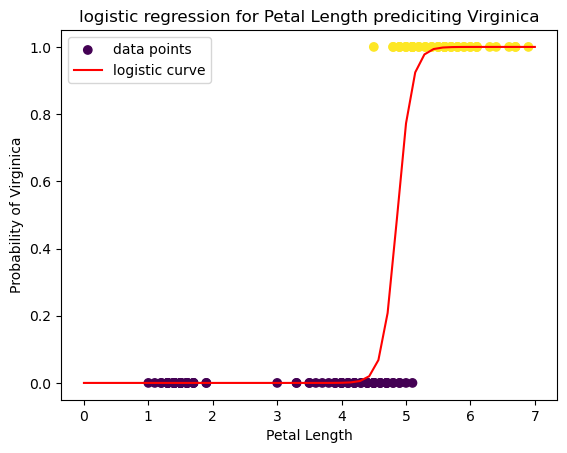

In [163]:
w = model.coef_
b = model.intercept_
c = (y==1)
x_axis = np.linspace(0,7)
y_axis = np.linspace(0,1)
plt.scatter(X,y, c=c, label = 'data points')
xplot = np.linspace(start=0, stop=7)
yplot = 1 / (1 + np.exp(-(w * xplot + b)))
plt.plot(xplot, yplot[0], color = 'red', label = 'logistic curve')
plt.title('logistic regression for Petal Length prediciting Virginica')
plt.xlabel('Petal Length')
plt.ylabel('Probability of Virginica')
plt.legend()

# 2. Decision tree

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

In [220]:
titanic = pd.read_csv('kaggle_titanic_train.csv')[['Survived','Pclass', 'Sex', 'Age']]
titanic = titanic.dropna()
titanic['Female'] = titanic.Sex == 'female'
titanic

,Survived,Pclass,Sex,Age,Female
0,0,3,male,22.0,False
1,1,1,female,38.0,True
2,1,3,female,26.0,True
3,1,1,female,35.0,True
4,0,3,male,35.0,False
...,...,...,...,...,...
885,0,3,female,39.0,True
886,0,2,male,27.0,False
887,1,1,female,19.0,True
889,1,1,male,26.0,False


In [208]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0)
feature_names = ['Pclass', 'Female', 'Age']
X = titanic[feature_names]
y = titanic.Survived
clf.fit(X,y)
#print(export_text(clf, feature_names=feature_names))
print(f'score is {clf.score(X,y)}')
print(f'max depth is {clf.tree_.max_depth}')

score is 0.896358543417367
max depth is 15


score is 0.7913165266106442


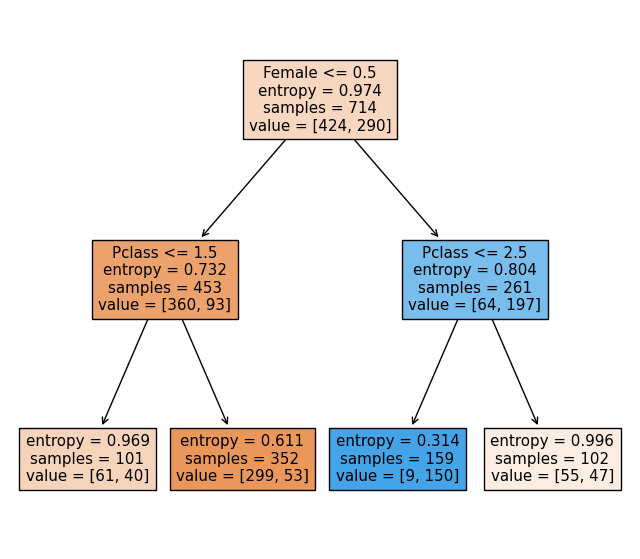

In [212]:
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
X = titanic[feature_names]
y = titanic.Survived
clf2.fit(X,y)
tree.plot_tree(clf2, feature_names=feature_names, filled=True)
print(f'score is {clf2.score(X,y)}')

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

In [5]:
#The features used are Female and Pclass

 ## 2c. What proportion (in the cleaned-up data) of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Female`
 column for each subset.

In [228]:
import statistics
females = titanic[(titanic['Female'] == True)]
print(f'females proportion {statistics.mean(females.Survived)}')
males = titanic[(titanic['Female'] == False)]
print(f'males proportion {statistics.mean(males.Survived)}')

females proportion 0.7547892720306514
males proportion 0.2052980132450331
